In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\rshib\Desktop\Krato\decision tree\titanic.txt")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df["Cabin"].fillna(0)

0         0
1       C85
2         0
3      C123
4         0
       ... 
886       0
887     B42
888       0
889    C148
890       0
Name: Cabin, Length: 891, dtype: object

In [4]:
df_sex = LabelEncoder()
df_embarked = LabelEncoder()
df_cabin = LabelEncoder()

In [5]:
df["Sex_n"] = df_sex.fit_transform(df["Sex"])
df["Embarked_n"] = df_sex.fit_transform(df["Embarked"])
df["Cabin_n"] = df_sex.fit_transform(df["Cabin"])

In [6]:
df.drop(columns=["Sex", "Cabin", "Embarked"], inplace=True)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_n,Embarked_n,Cabin_n
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,2,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,81
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,2,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,2,55
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,2,147
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,2,147
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,2,30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,0,2,147
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,60


In [7]:
df["Age"].isna().sum()

177

In [8]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [9]:
df["child_n"] = df.Age.apply(lambda x: 1 if (x<18) else 0 )
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_n,Embarked_n,Cabin_n,child_n
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,2,147,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,0,81,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,2,147,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,2,55,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,2,147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,1,2,147,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,0,2,30,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,0,2,147,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,1,0,60,0


<AxesSubplot:>

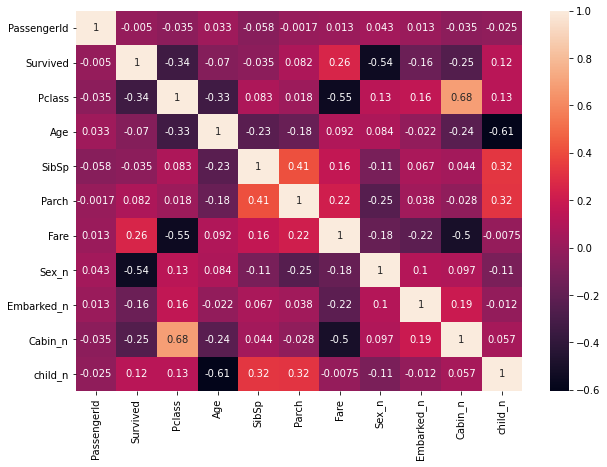

In [10]:
df_corr = df.corr()
plt.figure(figsize = (10,7))
sn.heatmap(df_corr, annot=True)

In [11]:
df.drop(columns=["SibSp", "Parch", "PassengerId"], inplace= True)

In [12]:
df.drop(columns=["Name", "Ticket"], inplace= True)

In [13]:
y = df["Survived"]
X = df.drop(columns=["Survived"])

In [14]:
X

,Pclass,Age,Fare,Sex_n,Embarked_n,Cabin_n,child_n
0,3,22.000000,7.2500,1,2,147,0
1,1,38.000000,71.2833,0,0,81,0
2,3,26.000000,7.9250,0,2,147,0
3,1,35.000000,53.1000,0,2,55,0
4,3,35.000000,8.0500,1,2,147,0
...,...,...,...,...,...,...,...
886,2,27.000000,13.0000,1,2,147,0
887,1,19.000000,30.0000,0,2,30,0
888,3,29.699118,23.4500,0,2,147,0
889,1,26.000000,30.0000,1,0,60,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=1)

In [16]:
# model = tree.DecisionTreeClassifier()

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=1)

In [18]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [19]:
model.score(X_test, y_test)

0.7988826815642458

In [20]:
pred = model.predict(X_test)

Text(69.0, 0.5, 'Truth')

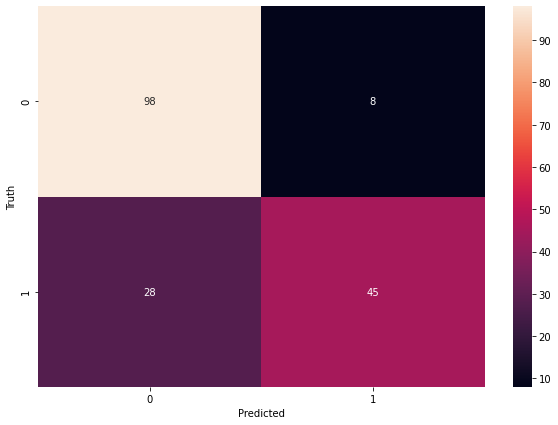

In [21]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
cross_val_score(LogisticRegression(max_iter=1000), X, y, cv =10).sum()/10

0.7878901373283396

In [23]:
cross_val_score(RandomForestClassifier(n_estimators=500, random_state=1), X, y, cv=10).sum()/10

0.8148938826466917

In [24]:
cross_val_score(SVC(), X, y, cv =10).sum()/10

0.6846441947565542

In [25]:
cross_val_score(tree.DecisionTreeClassifier(), X, y,cv =10).sum()/10

0.7812484394506866